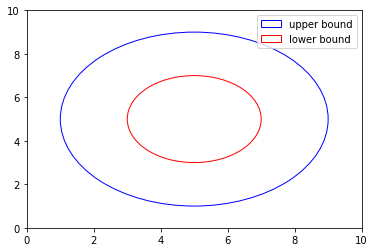

In [13]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper Parameters
BATCH_SIZE = 64         # number of PAINT_POINTS be created
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = 5             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = 1     # it could be total point G can draw in the canvas - for each batch, how many elements inside
# Need to check what does this PAINT_POINTS mean - vstack? linspace? for _ in ?
PAINT_POINTS = np.vstack([np.linspace(1, 2, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

# draw circle
fig, ax = plt.subplots()

circle_x=5
circle_y=5
circle1 = plt.Circle((circle_x, circle_y), 2*(PAINT_POINTS[0]+1), color='blue', fill=False)
circle2 = plt.Circle((circle_x, circle_y), (PAINT_POINTS[0]+1), color='r', fill=False)
ax.add_artist(circle1)
ax.add_artist(circle2)

# plt.axis('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend((circle1,circle2),('upper bound','lower bound'),loc='upper right')
plt.show()



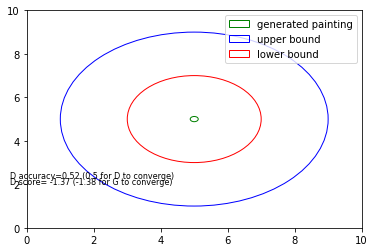

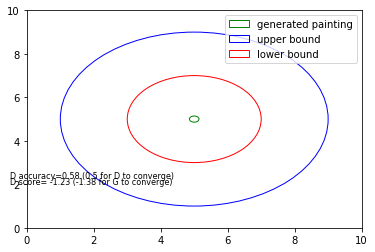

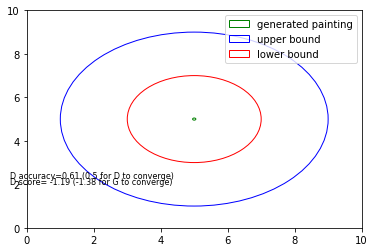

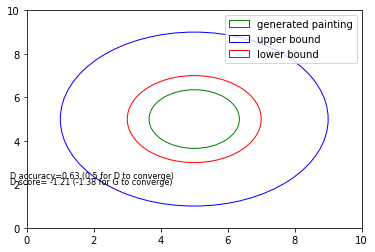

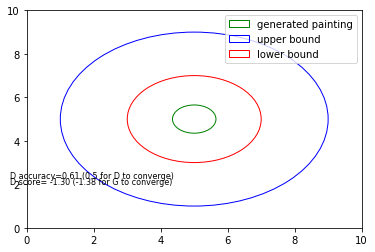

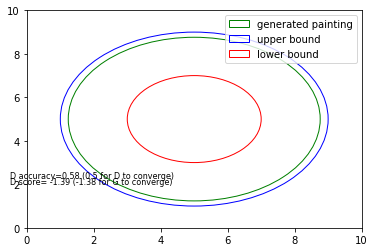

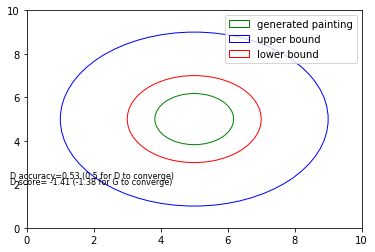

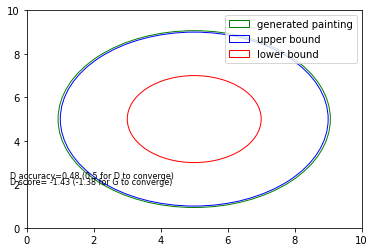

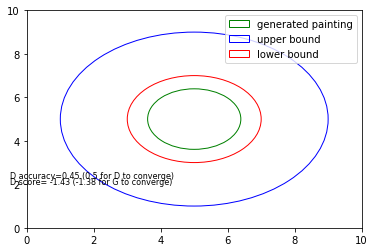

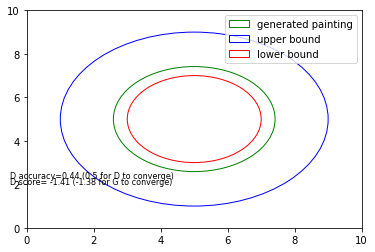

In [17]:
def artist_works():     # painting from the famous artist (real target)
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
#     paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    paintings = a*PAINT_POINTS
    paintings = torch.from_numpy(paintings).float()
    return paintings

G = nn.Sequential(                      # Generator
    nn.Linear(N_IDEAS, 64),            # random ideas (could from normal distribution)
    nn.ReLU(inplace=False),
    nn.Linear(64, ART_COMPONENTS),     # making a painting from these random ideas
)

D = nn.Sequential(                      # Discriminator
    nn.Linear(ART_COMPONENTS, 64),     # receive art work either from the famous artist or a newbie like G
    nn.ReLU(inplace=False),
    nn.Linear(64, 1),
    nn.Sigmoid(),                       # tell the probability that the art work is made by artist
)

opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

plt.ion()   # something about continuous plotting

for step in range(1000):
    artist_paintings = artist_works()           # real painting from artist
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)  # random ideas
    G_paintings = G(G_ideas)                    # fake painting from G (random ideas)

    prob_artist1 = D(G_paintings)               # D try to reduce this prob
    
    G_loss = torch.mean(torch.log(1. - prob_artist1))  
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    
    prob_artist0 = D(artist_paintings)          # D try to increase this prob
    prob_artist1 = D(G_paintings.detach())  # D try to reduce this prob
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))      

    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)      # reusing computational graph
    opt_D.step()
    

    if step % 100 == 0:  # plotting
        fig, ax = plt.subplots()
        circle_gan=plt.Circle((circle_x,circle_y), G_paintings.data.numpy()[0], color='g',fill=False )
        circle_upper = plt.Circle((circle_x, circle_y), 2*(PAINT_POINTS[0]+1), color='blue', fill=False)
        circle_lower = plt.Circle((circle_x, circle_y), (PAINT_POINTS[0]+1), color='r', fill=False)
        ax.add_artist(circle_gan)
        ax.add_artist(circle_upper)
        ax.add_artist(circle_lower)
        
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 8})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 8})
        plt.ylim(0, 10)
        plt.xlim(0, 10)
        plt.legend((circle_gan,circle_upper,circle_lower),('generated painting','upper bound','lower bound'),loc='upper right')
        plt.draw()
        plt.pause(0.01)

plt.ioff()
plt.show()

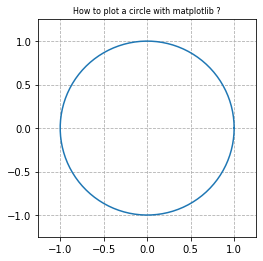

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# theta = np.linspace(0, 2*np.pi, 100)
theta = [np.linspace(0, 2*np.pi, ART_COMPONENTS) for _ in range(BATCH_SIZE)]

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1[0], x2[0])
ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')

plt.title('Perfect circle', fontsize=8)

plt.show()

In [ ]:
def artist_works():     # painting from the famous artist (real target)
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
#     paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    paintings = a*PAINT_POINTS
    paintings = torch.from_numpy(paintings).float()
    return paintings

G = nn.Sequential(                      # Generator
    nn.Linear(N_IDEAS, 64),            # random ideas (could from normal distribution)
    nn.ReLU(inplace=False),
    nn.Linear(64, ART_COMPONENTS),     # making a painting from these random ideas
)

D = nn.Sequential(                      # Discriminator
    nn.Linear(ART_COMPONENTS, 64),     # receive art work either from the famous artist or a newbie like G
    nn.ReLU(inplace=False),
    nn.Linear(64, 1),
    nn.Sigmoid(),                       # tell the probability that the art work is made by artist
)

opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

plt.ion()   # something about continuous plotting

for step in range(1000):
    artist_paintings = artist_works()           # real painting from artist
    G_ideas = torch.randn(BATCH_SIZE, N_IDEAS, requires_grad=True)  # random ideas
    G_paintings = G(G_ideas)                    # fake painting from G (random ideas)

    prob_artist1 = D(G_paintings)               # D try to reduce this prob
    
    G_loss = torch.mean(torch.log(1. - prob_artist1))  
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    
    prob_artist0 = D(artist_paintings)          # D try to increase this prob
    prob_artist1 = D(G_paintings.detach())  # D try to reduce this prob
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))      

    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)      # reusing computational graph
    opt_D.step()
    

    if step % 100 == 0:  # plotting
        fig, ax = plt.subplots()
        circle_gan=plt.Circle((circle_x,circle_y), G_paintings.data.numpy()[0], color='g',fill=False )
        circle_upper = plt.Circle((circle_x, circle_y), 2*(PAINT_POINTS[0]+1), color='blue', fill=False)
        circle_lower = plt.Circle((circle_x, circle_y), (PAINT_POINTS[0]+1), color='r', fill=False)
        ax.add_artist(circle_gan)
        ax.add_artist(circle_upper)
        ax.add_artist(circle_lower)
        
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 8})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 8})
        plt.ylim(0, 10)
        plt.xlim(0, 10)
        plt.legend((circle_gan,circle_upper,circle_lower),('generated painting','upper bound','lower bound'),loc='upper right')
        plt.draw()
        plt.pause(0.01)

plt.ioff()
plt.show()